# Weather Trend Forcasting

## Import Data and Packages

In [98]:
import shutil
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn
from sklearn import preprocessing

In [ ]:
path = kagglehub.dataset_download("nelgiriyewithana/global-weather-repository")

print("Path to dataset files:", path)

100%|██████████| 3.85M/3.85M [00:02<00:00, 1.62MB/s]

Extracting files...
Path to dataset files: C:\Users\salma\.cache\kagglehub\datasets\nelgiriyewithana\global-weather-repository\versions\482


In [8]:
shutil.move("C:\\Users\\salma\\.cache\\kagglehub\\datasets\\nelgiriyewithana\\global-weather-repository\\versions\\482", "C:\\Users\\salma\\pyworkspace\\weather-trend-forcasting\\data")

'C:\\Users\\salma\\pyworkspace\\weather-trend-forcasting\\data\\482'

In [300]:
df = pd.read_csv("data/482/GlobalWeatherRepository.csv")
df

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.400,26.600,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.3300,19.8200,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.100,2.000,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.7600,3.0500,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.400,18.400,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.5000,1.5200,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.700,0.900,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.8400,13.2300,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.400,262.300,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49691,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1737973800,2025-01-27 06:30,22.3,72.1,Clear,...,14.985,19.240,1,2,06:51 AM,06:30 PM,05:11 AM,04:53 PM,Waning Crescent,7
49692,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1737973800,2025-01-27 17:30,18.4,65.1,Sunny,...,23.310,27.750,2,2,06:35 AM,05:44 PM,04:39 AM,03:28 PM,Waning Crescent,9
49693,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1737973800,2025-01-27 13:30,20.1,68.3,Sunny,...,18.130,42.735,2,2,06:33 AM,05:59 PM,04:41 AM,03:59 PM,Waning Crescent,8
49694,Zambia,Lusaka,-15.4167,28.2833,Africa/Lusaka,1737973800,2025-01-27 12:30,24.2,75.5,Light rain shower,...,5.365,5.365,1,1,05:55 AM,06:44 PM,03:36 AM,05:14 PM,Waning Crescent,8


In [279]:
df.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,49696.000000,49696.000000,4.969600e+04,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,...,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000
mean,19.140833,22.203601,1.726922e+09,22.945694,73.303705,8.286872,13.340430,170.844012,1013.758814,29.935694,...,19.278570,518.210443,62.810470,14.169951,10.738422,23.726655,46.705987,1.657518,2.531230,49.256479
std,24.480847,65.791240,6.436321e+06,9.214742,16.586447,9.817821,15.798945,103.155171,7.074444,0.208802,...,17.510558,989.890365,37.662815,25.872917,51.722746,45.688969,141.587519,0.964330,2.484448,34.820791
min,-41.300000,-175.200000,1.715849e+09,-24.800000,-12.600000,2.200000,3.600000,1.000000,964.000000,28.470000,...,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.185000,0.185000,1.000000,1.000000,0.000000
25%,3.750000,-6.250000,1.721307e+09,18.200000,64.700000,4.000000,6.500000,82.000000,1010.000000,29.830000,...,10.800000,220.300000,37.000000,0.900000,0.700000,4.800000,7.770000,1.000000,1.000000,15.000000
50%,17.250000,23.320000,1.727001e+09,25.300000,77.500000,6.900000,11.200000,164.000000,1013.000000,29.910000,...,17.000000,312.650000,59.000000,2.960000,2.100000,12.038000,18.870000,1.000000,2.000000,49.000000
75%,40.400000,50.580000,1.732523e+09,29.000000,84.200000,11.600000,18.700000,258.000000,1017.000000,30.030000,...,25.700000,480.700000,83.175000,14.430000,7.955000,26.640000,42.550000,2.000000,3.000000,83.000000
max,64.150000,179.220000,1.737974e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,1080.000000,31.890000,...,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.100000,5858.020000,6.000000,10.000000,100.000000


In [280]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=[object]).columns
hour_columns = ["sunrise", "sunset", "moonrise", "moonset"]
last_uptade_column = ["last_update"]

# Ensure the columns exist before dropping them
columns_to_drop = [col for col in hour_columns + last_uptade_column if col in categorical_columns]
categorical_columns = categorical_columns.drop(columns_to_drop)

In [302]:
print(df["last_updated"].head())

# Convert the last_updated column to datetime
df["last_updated"] = pd.to_datetime(df["last_updated"])
df["last_updated"].head()

0    2024-05-16 13:15
1    2024-05-16 10:45
2    2024-05-16 09:45
3    2024-05-16 10:45
4    2024-05-16 09:45
Name: last_updated, dtype: object


0   2024-05-16 13:15:00
1   2024-05-16 10:45:00
2   2024-05-16 09:45:00
3   2024-05-16 10:45:00
4   2024-05-16 09:45:00
Name: last_updated, dtype: datetime64[ns]

In [281]:
df[numerical_columns].head()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
0,34.52,69.18,1715849100,26.6,79.8,8.3,13.3,338,1012.0,29.89,...,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1,55
1,41.33,19.82,1715849100,19.0,66.2,6.9,11.2,320,1012.0,29.88,...,18.4,193.6,97.3,0.9,0.1,1.1,2.0,1,1,55
2,36.76,3.05,1715849100,23.0,73.4,9.4,15.1,280,1011.0,29.85,...,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1,55
3,42.50,1.52,1715849100,6.3,43.3,7.4,11.9,215,1007.0,29.75,...,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1,55
4,-8.84,13.23,1715849100,26.0,78.8,8.1,13.0,150,1011.0,29.85,...,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10,55


In [282]:
df[categorical_columns].head()

,country,location_name,timezone,last_updated,condition_text,wind_direction,moon_phase
0,Afghanistan,Kabul,Asia/Kabul,2024-05-16 13:15,Partly Cloudy,NNW,Waxing Gibbous
1,Albania,Tirana,Europe/Tirane,2024-05-16 10:45,Partly cloudy,NW,Waxing Gibbous
2,Algeria,Algiers,Africa/Algiers,2024-05-16 09:45,Sunny,W,Waxing Gibbous
3,Andorra,Andorra La Vella,Europe/Andorra,2024-05-16 10:45,Light drizzle,SW,Waxing Gibbous
4,Angola,Luanda,Africa/Luanda,2024-05-16 09:45,Partly cloudy,SSE,Waxing Gibbous


In [283]:
df[hour_columns].head()

,sunrise,sunset,moonrise,moonset
0,04:50 AM,06:50 PM,12:12 PM,01:11 AM
1,05:21 AM,07:54 PM,12:58 PM,02:14 AM
2,05:40 AM,07:50 PM,01:15 PM,02:14 AM
3,06:31 AM,09:11 PM,02:12 PM,03:31 AM
4,06:12 AM,05:55 PM,01:17 PM,12:38 AM


## Data Cleaning & Preprocessing

### Change Hour Datatype to Datetime

In [284]:
# change hour columns to datetime datatype
for col in hour_columns:
    df[col] = pd.to_datetime(df[col], format='%I:%M %p', errors='coerce')

# remove the date in the hour columns
for col in hour_columns:
    df[col] = df[col].dt.time

df[hour_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49696 entries, 0 to 49695
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sunrise   49696 non-null  object
 1   sunset    49696 non-null  object
 2   moonrise  47953 non-null  object
 3   moonset   48149 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


### Find Missing Value

In [285]:
# find missing values
df.isnull().sum()

country                            0
location_name                      0
latitude                           0
longitude                          0
timezone                           0
last_updated_epoch                 0
last_updated                       0
temperature_celsius                0
temperature_fahrenheit             0
condition_text                     0
wind_mph                           0
wind_kph                           0
wind_degree                        0
wind_direction                     0
pressure_mb                        0
pressure_in                        0
precip_mm                          0
precip_in                          0
humidity                           0
cloud                              0
feels_like_celsius                 0
feels_like_fahrenheit              0
visibility_km                      0
visibility_miles                   0
uv_index                           0
gust_mph                           0
gust_kph                           0
a

there's no missing value

### Handle outliers

In [286]:
# find outliers of numerical columns with iqrs
def find_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data > upper_bound) | (data < lower_bound)]

columns_with_outliers = []
for col in numerical_columns:
    outliers = find_outliers_iqr(df[col])
    if not outliers.empty:
        columns_with_outliers.append(col)
        print(f"Outliers in {col}: {outliers} \n")

Outliers in longitude: 8        149.2200
58       178.4200
85       139.6900
89       169.5300
107      171.3800
           ...   
49660    159.9500
49677   -175.2000
49682    179.2167
49687   -123.0439
49690    168.3167
Name: longitude, Length: 3823, dtype: float64 

Outliers in temperature_celsius: 35        1.0
784      -1.0
1369      1.0
1564      1.0
2344      0.0
         ... 
49615   -21.6
49628    -4.4
49630     0.4
49663    -0.8
49669    -1.9
Name: temperature_celsius, Length: 1503, dtype: float64 

Outliers in temperature_fahrenheit: 35       33.8
784      30.2
1369     33.8
1564     33.8
2344     32.0
         ... 
49615    -6.9
49628    24.0
49630    32.7
49663    30.6
49669    28.6
Name: temperature_fahrenheit, Length: 1496, dtype: float64 

Outliers in wind_mph: 153      25.5
239      25.5
259      24.2
324      28.6
348      26.6
         ... 
49601    23.5
49608    23.5
49646    24.2
49648    23.3
49665    26.2
Name: wind_mph, Length: 540, dtype: float64 

Outliers in w

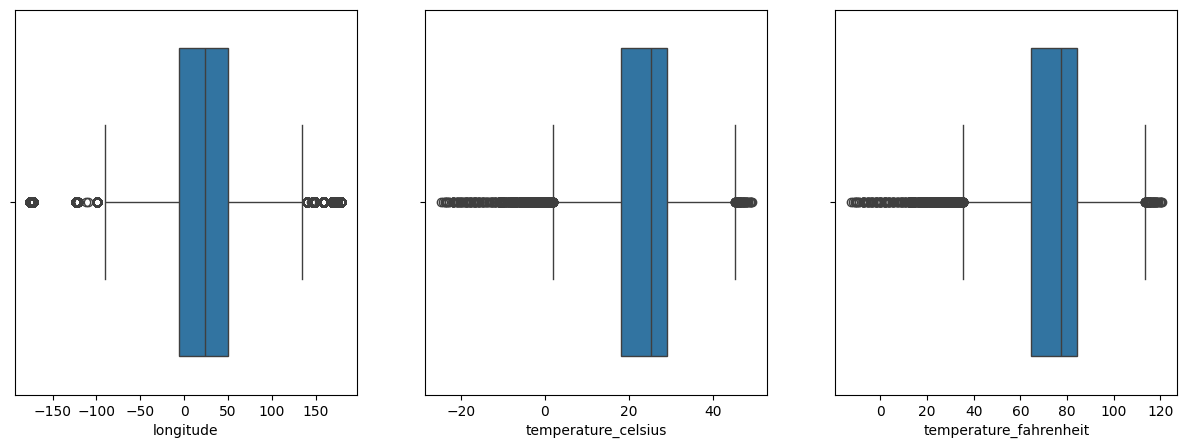

In [287]:
# Plot example of outliers before removing
columns_with_outliers[:3]
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x=df[columns_with_outliers[0]], ax=ax[0])
sns.boxplot(x=df[columns_with_outliers[1]], ax=ax[1])
sns.boxplot(x=df[columns_with_outliers[2]], ax=ax[2])
plt.show()

In [288]:
# change outliers with iqr method
def change_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data = np.where(data > upper_bound, upper_bound, data)
    data = np.where(data < lower_bound, lower_bound, data)
    return data

for col in numerical_columns:
    # if columns is precip_in skip the change_outliers_iqr function
    if col == "precip_in":
        continue
    df[col] = change_outliers_iqr(df[col])

# check if outliers are changed
for col in numerical_columns:
    outliers = find_outliers_iqr(df[col])
    if not outliers.empty:
        print(f"Outliers in {col}: {outliers} \n")


Outliers in precip_in: 3        0.01
7        0.01
16       0.01
19       0.01
40       0.01
         ... 
49673    0.01
49675    0.05
49677    0.07
49690    0.01
49694    0.07
Name: precip_in, Length: 7985, dtype: float64 



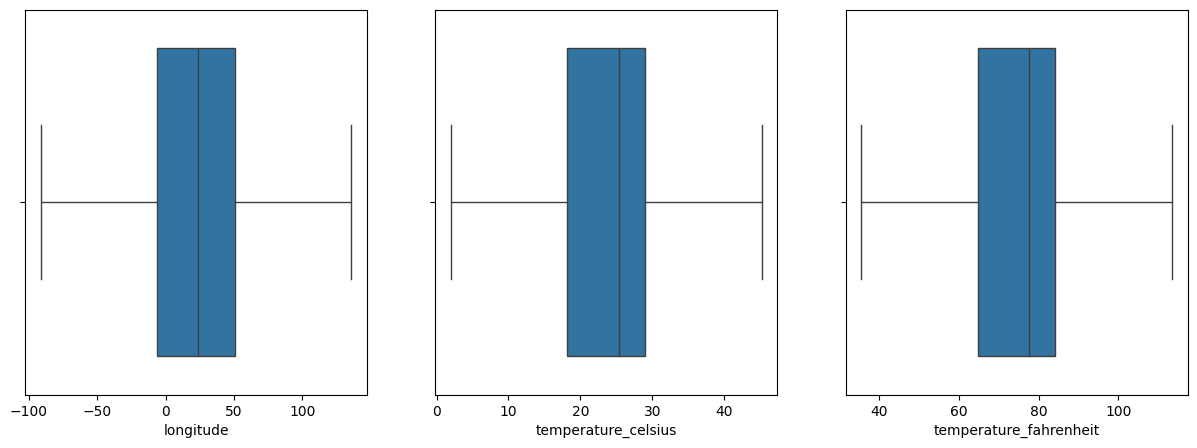

In [289]:
# plot example of outliers after changing
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x=df[columns_with_outliers[0]], ax=ax[0])
sns.boxplot(x=df[columns_with_outliers[1]], ax=ax[1])
sns.boxplot(x=df[columns_with_outliers[2]], ax=ax[2])
plt.show()

### Normalize Data

In [290]:
# data before normalization
df[numerical_columns].head()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
0,34.52,69.18,1.715849e+09,26.6,79.8,8.3,13.3,338.0,1012.0,29.89,...,15.3,277.0,103.0,1.100,0.2000,8.4,26.60,1.0,1.0,55.0
1,41.33,19.82,1.715849e+09,19.0,66.2,6.9,11.2,320.0,1012.0,29.88,...,18.4,193.6,97.3,0.900,0.1000,1.1,2.00,1.0,1.0,55.0
2,36.76,3.05,1.715849e+09,23.0,73.4,9.4,15.1,280.0,1011.0,29.85,...,22.3,540.7,12.2,34.725,13.4000,10.4,18.40,1.0,1.0,55.0
3,42.50,1.52,1.715849e+09,6.3,43.3,7.4,11.9,215.0,1007.0,29.75,...,13.7,170.2,64.4,1.600,0.2000,0.7,0.90,1.0,1.0,55.0
4,-8.84,13.23,1.715849e+09,26.0,78.8,8.1,13.0,150.0,1011.0,29.85,...,20.2,871.3,19.0,34.725,18.8375,59.4,94.72,3.5,6.0,55.0


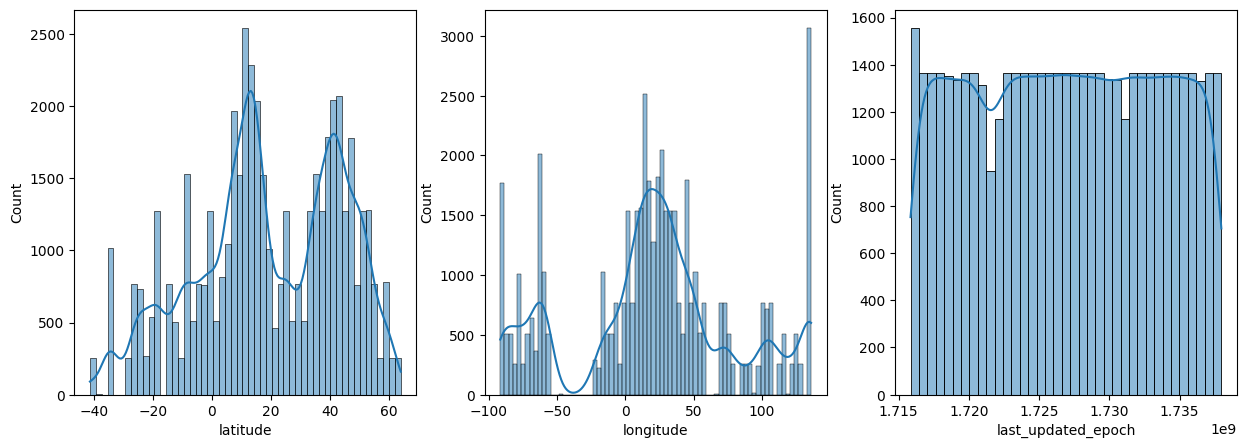

In [291]:
# plot data before normalization
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df[numerical_columns[0]], ax=ax[0], kde=True)
sns.histplot(df[numerical_columns[1]], ax=ax[1], kde=True)
sns.histplot(df[numerical_columns[2]], ax=ax[2], kde=True)
plt.show()

In [292]:
# normalize numerical columns
df[numerical_columns] = preprocessing.normalize(df[numerical_columns])

# data after normalization
df[numerical_columns].head()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
0,2.011832e-08,4.031823e-08,1.0,1.550253e-08,4.650759e-08,4.837255e-09,7.751264e-09,1.969870e-07,5.897955e-07,1.741995e-08,...,8.916868e-09,1.614361e-07,6.002859e-08,6.410820e-10,1.165604e-10,4.895535e-09,1.550253e-08,5.828018e-10,5.828018e-10,3.205410e-08
1,2.408720e-08,1.155113e-08,1.0,1.107323e-08,3.858148e-08,4.021333e-09,6.527381e-09,1.864966e-07,5.897955e-07,1.741412e-08,...,1.072355e-08,1.128304e-07,5.670662e-08,5.245216e-10,5.828018e-11,6.410820e-10,1.165604e-09,5.828018e-10,5.828018e-10,3.205410e-08
2,2.142380e-08,1.777546e-09,1.0,1.340444e-08,4.277765e-08,5.478337e-09,8.800308e-09,1.631845e-07,5.892127e-07,1.739663e-08,...,1.299648e-08,3.151210e-07,7.110182e-09,2.023779e-08,7.809545e-09,6.061139e-09,1.072355e-08,5.828018e-10,5.828018e-10,3.205410e-08
3,2.476908e-08,8.858588e-10,1.0,3.671652e-09,2.523532e-08,4.312734e-09,6.935342e-09,1.253024e-07,5.868814e-07,1.733835e-08,...,7.984385e-09,9.919287e-08,3.753244e-08,9.324829e-10,1.165604e-10,4.079613e-10,5.245216e-10,5.828018e-10,5.828018e-10,3.205410e-08
4,-5.151968e-09,7.710468e-09,1.0,1.515285e-08,4.592478e-08,4.720695e-09,7.576424e-09,8.742027e-08,5.892127e-07,1.739663e-08,...,1.177260e-08,5.077952e-07,1.107323e-08,2.023779e-08,1.097853e-08,3.461843e-08,5.520299e-08,2.039806e-09,3.496811e-09,3.205410e-08


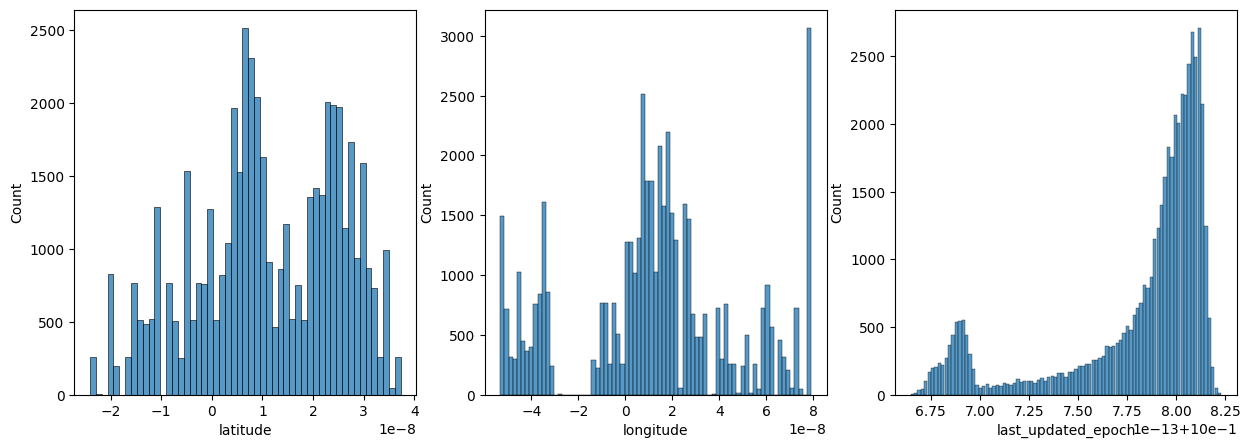

In [293]:
# plot normalized data
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df[numerical_columns[0]], ax=ax[0])
sns.histplot(df[numerical_columns[1]], ax=ax[1])
sns.histplot(df[numerical_columns[2]], ax=ax[2])
plt.show()

## Exploratory Data Analysis (EDA)

### Find Trend

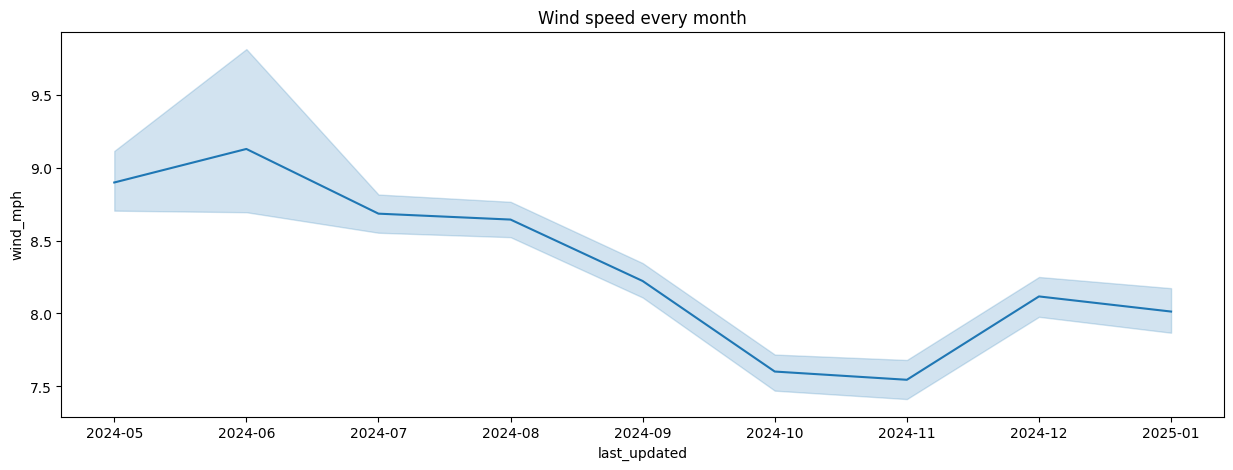

In [311]:
# find trend in windowed data
windowed_data = df["last_updated"].dt.to_period("M").astype(str)

# plot wind speed every month
plt.figure(figsize=(15, 5))
sns.lineplot(x=windowed_data, y=df["wind_mph"])
plt.title("Wind speed every month")
plt.show()

In [262]:
df[numerical_columns]

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
0,34.5200,69.1800,1715849100,26.6,79.8,8.3,13.3,338,1012.0,29.89,...,15.3,277.0,103.0,1.100,0.200,8.400,26.600,1,1,55
1,41.3300,19.8200,1715849100,19.0,66.2,6.9,11.2,320,1012.0,29.88,...,18.4,193.6,97.3,0.900,0.100,1.100,2.000,1,1,55
2,36.7600,3.0500,1715849100,23.0,73.4,9.4,15.1,280,1011.0,29.85,...,22.3,540.7,12.2,65.100,13.400,10.400,18.400,1,1,55
3,42.5000,1.5200,1715849100,6.3,43.3,7.4,11.9,215,1007.0,29.75,...,13.7,170.2,64.4,1.600,0.200,0.700,0.900,1,1,55
4,-8.8400,13.2300,1715849100,26.0,78.8,8.1,13.0,150,1011.0,29.85,...,20.2,2964.0,19.0,72.700,31.500,183.400,262.300,5,10,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49691,10.5000,-66.9167,1737973800,22.3,72.1,4.0,6.5,163,1013.0,29.91,...,13.6,810.3,86.0,11.285,3.885,14.985,19.240,1,2,7
49692,21.0333,105.8500,1737973800,18.4,65.1,3.1,5.0,358,1020.0,30.12,...,6.7,928.7,81.0,11.470,33.300,23.310,27.750,2,2,9
49693,15.3547,44.2067,1737973800,20.1,68.3,7.2,11.5,238,1013.0,29.93,...,13.2,362.6,98.0,0.740,1.480,18.130,42.735,2,2,8
49694,-15.4167,28.2833,1737973800,24.2,75.5,2.2,3.6,219,1010.0,29.81,...,10.8,399.6,51.0,0.925,0.925,5.365,5.365,1,1,8


In [261]:
df[categorical_columns].head()

,country,location_name,timezone,last_updated,condition_text,wind_direction,moon_phase
0,Afghanistan,Kabul,Asia/Kabul,2024-05-16 13:15,Partly Cloudy,NNW,Waxing Gibbous
1,Albania,Tirana,Europe/Tirane,2024-05-16 10:45,Partly cloudy,NW,Waxing Gibbous
2,Algeria,Algiers,Africa/Algiers,2024-05-16 09:45,Sunny,W,Waxing Gibbous
3,Andorra,Andorra La Vella,Europe/Andorra,2024-05-16 10:45,Light drizzle,SW,Waxing Gibbous
4,Angola,Luanda,Africa/Luanda,2024-05-16 09:45,Partly cloudy,SSE,Waxing Gibbous


### Find Correlation between Columns

In [208]:
# find correlation between numerical columns
correlation = df[numerical_columns].corr()

correlation score explanation

if close to 1, it means that the two columns are positively correlated

if close to -1, it means that the two columns are negatively correlated

<Figure size 1500x1000 with 0 Axes>

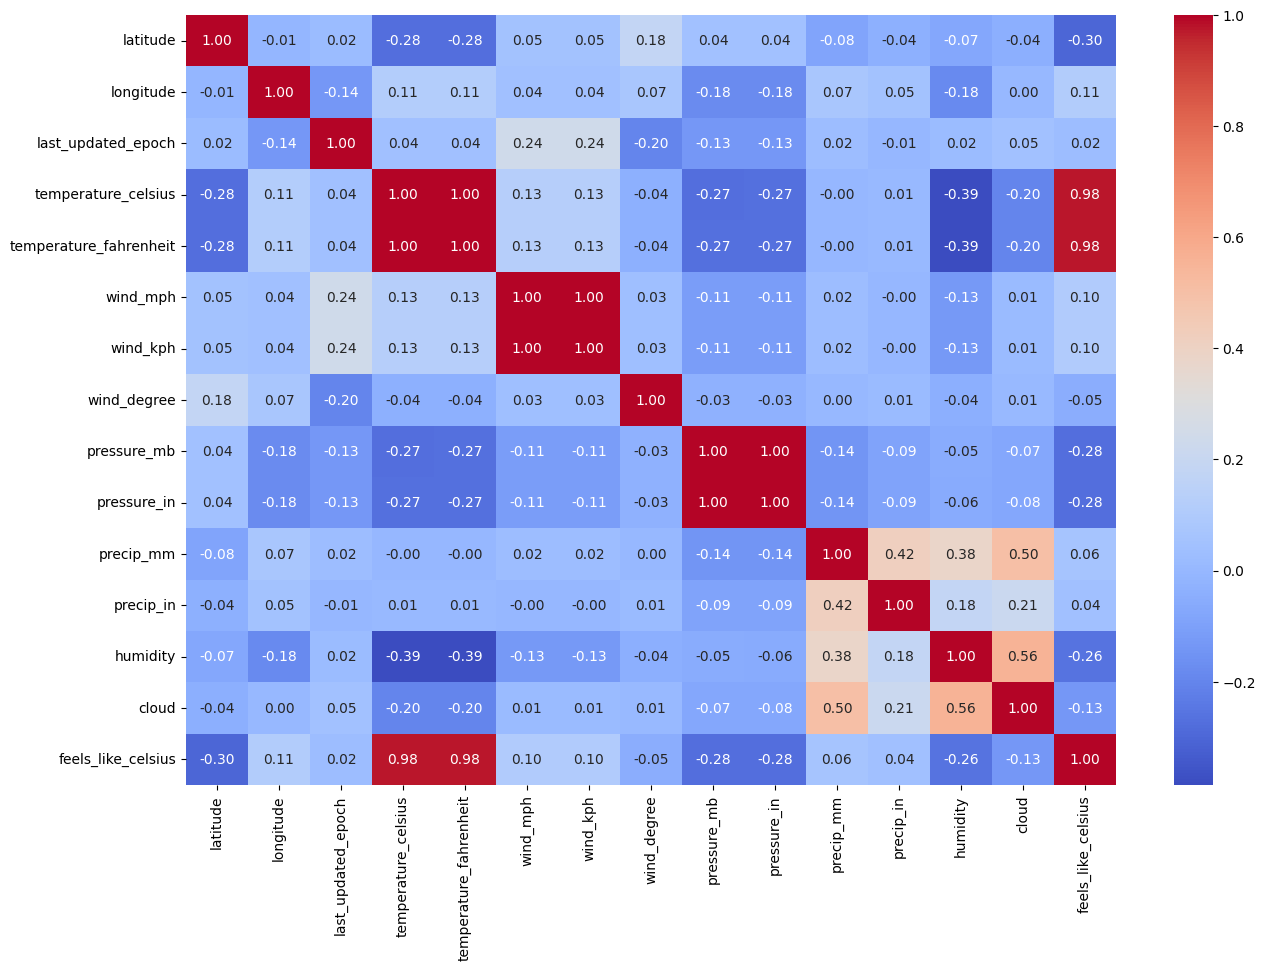

In [206]:
# plot correlation of 15 columns
plt.figure(figsize=(15, 10))
sns.heatmap(correlation.iloc[:15, :15], annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

## Modelling

## Model Evaluation

## Predict New Data